## ***Author: Saikumar Mehtre***

In [1]:
#Import Data Manupulation Library
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

#Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Import Filter Warnings Library
import warnings
warnings.filterwarnings("ignore")

#Import Logging Library
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(levelname)s - %(message)s - %(asctime)s',force=True)

### *Loading Dataset*

In [3]:
#Import Data Using Pandas Function

url="https://raw.githubusercontent.com/Saimehtre18/CodeB_Intership/refs/heads/main/dataset_phishing.csv"
df=pd.read_csv(url)
df.sample(frac=1) # Shuffle the DataFrame rows
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


### *📊 Exploratory Data Analysis (EDA)*

#### *Overview of the dataset, including the number of features, types of data (numerical, categorical, etc.), and target variable distribution*

In [4]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
df.shape

(11430, 89)

In [7]:
# Checking Null Value in DataSet
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [10]:
# Checking the statistical summary of the dataset
# Checking the correlation between the features
df.describe() 

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [8]:
#Summary of numerical features 
df.describe()

{"type":"dataframe"}

#Display unique values in categorical features
df.select_dtypes(include=['object']).nunique()

url       11429
status        2
dtype: int64

##### *Separating numerical and categorical columns*

In [22]:
Numerical_Data=df.select_dtypes(exclude=['object'])
Categorical_Data=df.select_dtypes(include=['object'])

In [23]:
Numerical_Data

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,0
11426,84,18,0,5,0,1,1,0,0,1,...,1,0,0,211,6728,0,0,1,0,1
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,0
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,0


In [24]:
Categorical_Data

,url
0,http://www.crestonwood.com/router.php
1,http://shadetreetechnology.com/V4/validation/a...
2,https://support-appleld.com.secureupdate.duila...
3,http://rgipt.ac.in
4,http://www.iracing.com/tracks/gateway-motorspo...
...,...
11425,http://www.fontspace.com/category/blackletter
11426,http://www.budgetbots.com/server.php/Server%20...
11427,https://www.facebook.com/Interactive-Televisio...
11428,http://www.mypublicdomainpictures.com/


In [25]:
# Checking Descriptive Stats:

from collections import OrderedDict
stats=[]

for col in df.columns:
    if df[col].dtype !='object':
        numerical_stats=OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)
report=pd.DataFrame(stats)
report


,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis
0,length_url,12.0,1641.0,61.126684,26.0,33.0,71.0,38.0,5.529732e+01,8.085190,144.196391
1,length_hostname,4.0,214.0,21.090289,16.0,15.0,24.0,9.0,1.077717e+01,5.160078,69.829931
2,ip,0.0,1.0,0.150569,0.0,0.0,0.0,0.0,3.576436e-01,1.954418,1.820067
3,nb_dots,1.0,24.0,2.480752,2.0,2.0,3.0,1.0,1.369686e+00,5.718117,66.155843
4,nb_hyphens,0.0,43.0,0.997550,0.0,0.0,1.0,1.0,2.087087e+00,4.695239,40.696686
...,...,...,...,...,...,...,...,...,...,...,...
83,web_traffic,0.0,10767986.0,856756.643307,0.0,0.0,373845.5,373845.5,1.995606e+06,2.779269,7.306645
84,dns_record,0.0,1.0,0.020122,0.0,0.0,0.0,0.0,1.404254e-01,6.835821,44.736280
85,google_index,0.0,1.0,0.533946,1.0,0.0,1.0,1.0,4.988682e-01,-0.136115,-1.981820
86,page_rank,0.0,10.0,3.185739,0.0,1.0,5.0,4.0,2.536955e+00,0.446031,-0.386315


In [26]:
df.url.nunique()

11429

In [27]:
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   
    UW = Q3 + 1.5 * IQR   
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

report


,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,length_url,12.0,1641.0,61.126684,26.0,33.0,71.0,38.0,5.529732e+01,8.085190,144.196391,Has Outliers
1,length_hostname,4.0,214.0,21.090289,16.0,15.0,24.0,9.0,1.077717e+01,5.160078,69.829931,Has Outliers
2,ip,0.0,1.0,0.150569,0.0,0.0,0.0,0.0,3.576436e-01,1.954418,1.820067,Has Outliers
3,nb_dots,1.0,24.0,2.480752,2.0,2.0,3.0,1.0,1.369686e+00,5.718117,66.155843,Has Outliers
4,nb_hyphens,0.0,43.0,0.997550,0.0,0.0,1.0,1.0,2.087087e+00,4.695239,40.696686,Has Outliers
...,...,...,...,...,...,...,...,...,...,...,...,...
83,web_traffic,0.0,10767986.0,856756.643307,0.0,0.0,373845.5,373845.5,1.995606e+06,2.779269,7.306645,Has Outliers
84,dns_record,0.0,1.0,0.020122,0.0,0.0,0.0,0.0,1.404254e-01,6.835821,44.736280,Has Outliers
85,google_index,0.0,1.0,0.533946,1.0,0.0,1.0,1.0,4.988682e-01,-0.136115,-1.981820,No Outliers
86,page_rank,0.0,10.0,3.185739,0.0,1.0,5.0,4.0,2.536955e+00,0.446031,-0.386315,No Outliers


In [16]:

df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [17]:
df['status'].mode()

0    legitimate
1      phishing
Name: status, dtype: object

In [18]:

# Encoding Target column
df['status']=df['status'].replace({'legitimate':0,'phishing':1})
df['status']


0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

##### *The target variable status was originally categorical, labeled as “phishing” and “legitimate.” It was converted into a binary format (1 and 0) for model compatibility.*

### *Histogram*

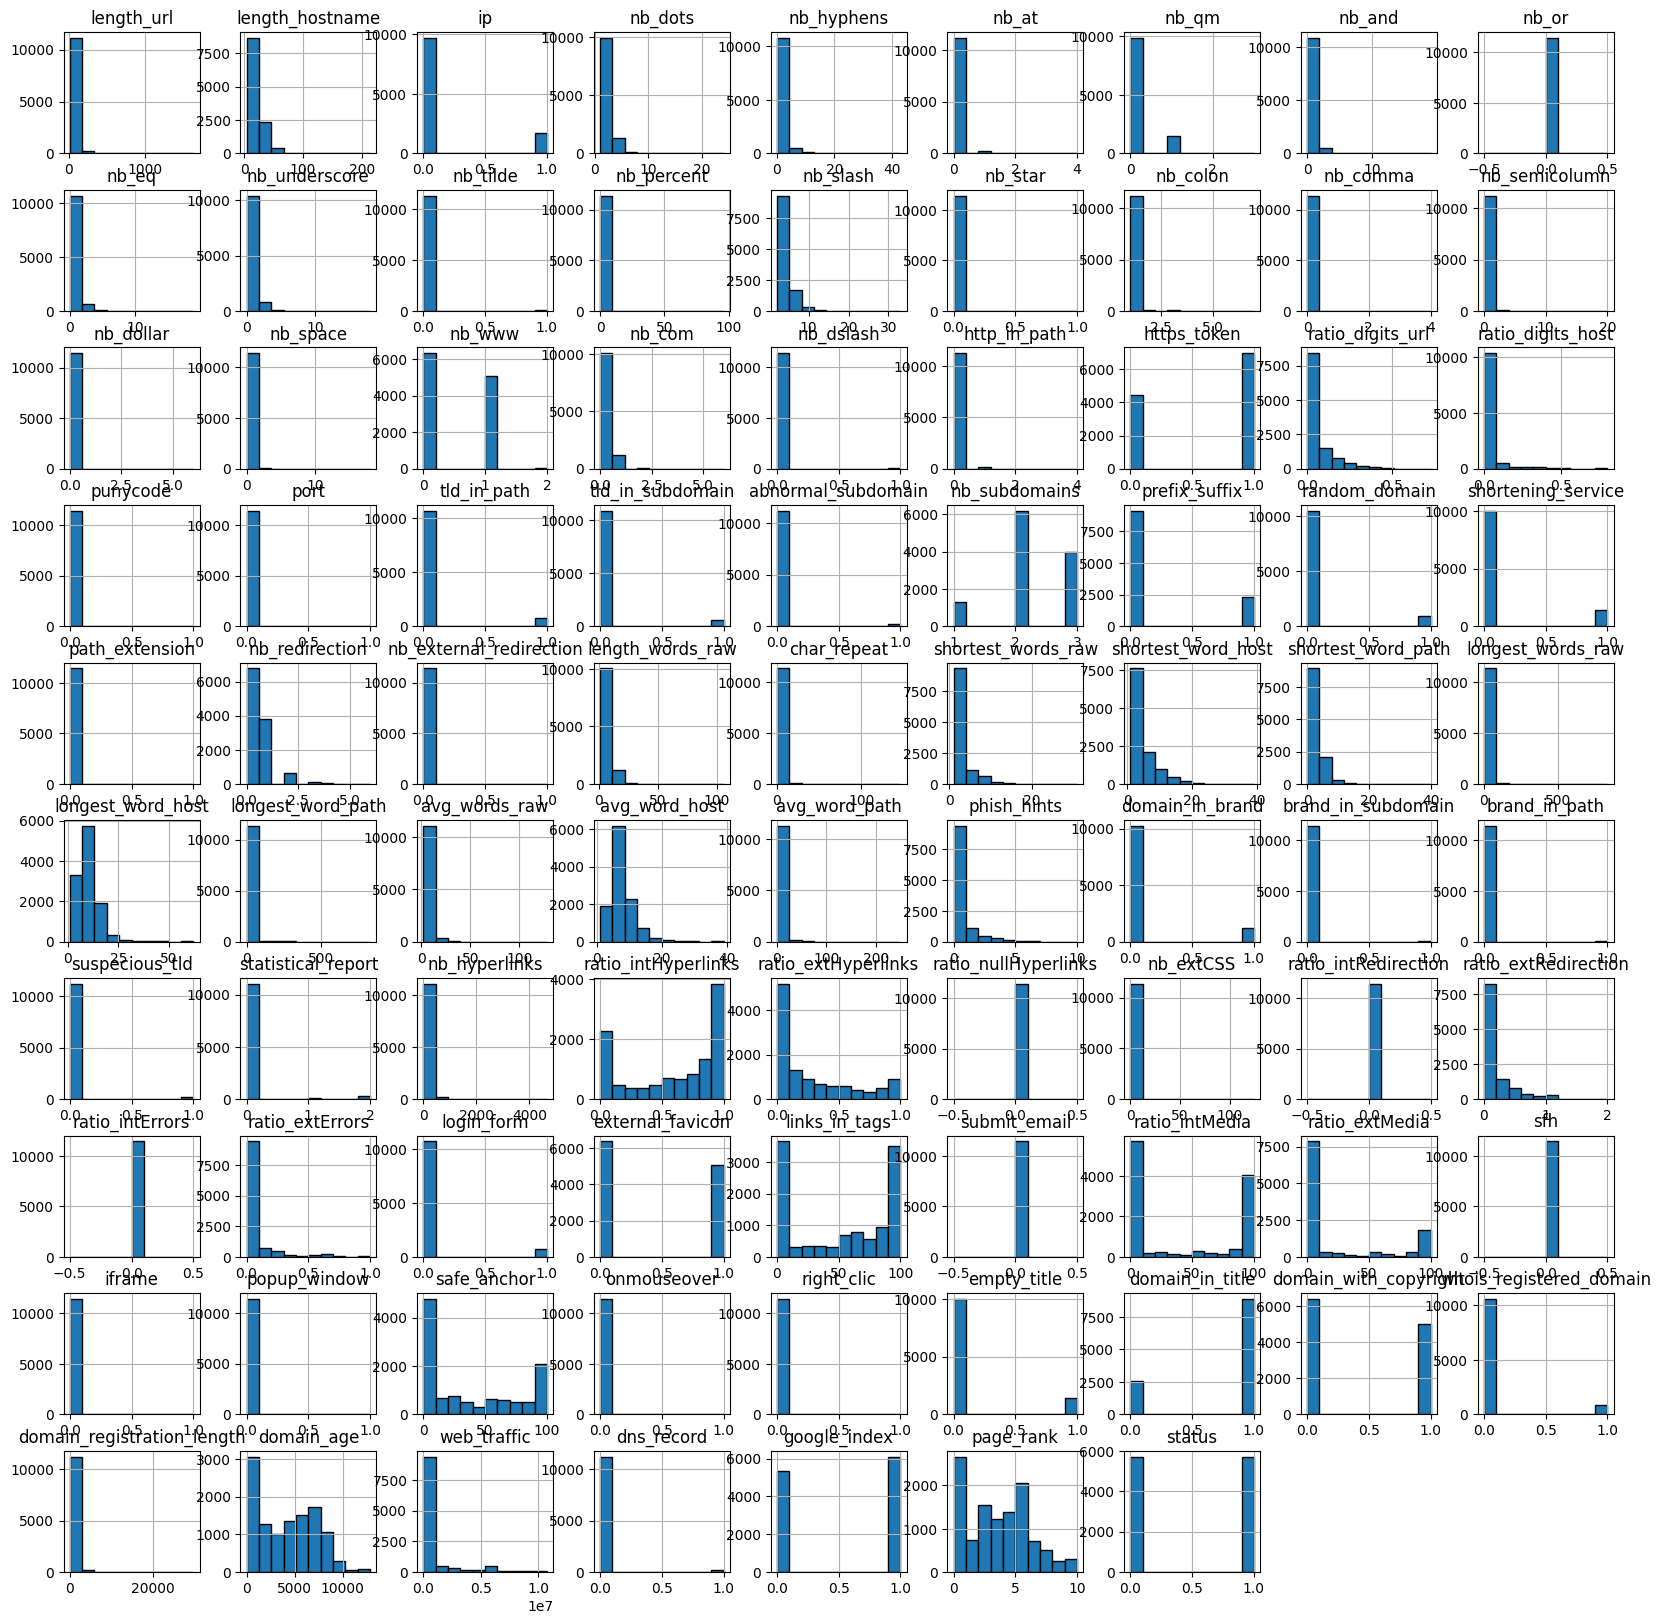

In [28]:

#Plotting Histogram
Numerical_Data.hist(figsize=(20,20),bins=10,edgecolor='black')
plt.title('Histogram example',y=1.02)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


### *Pair Plot*

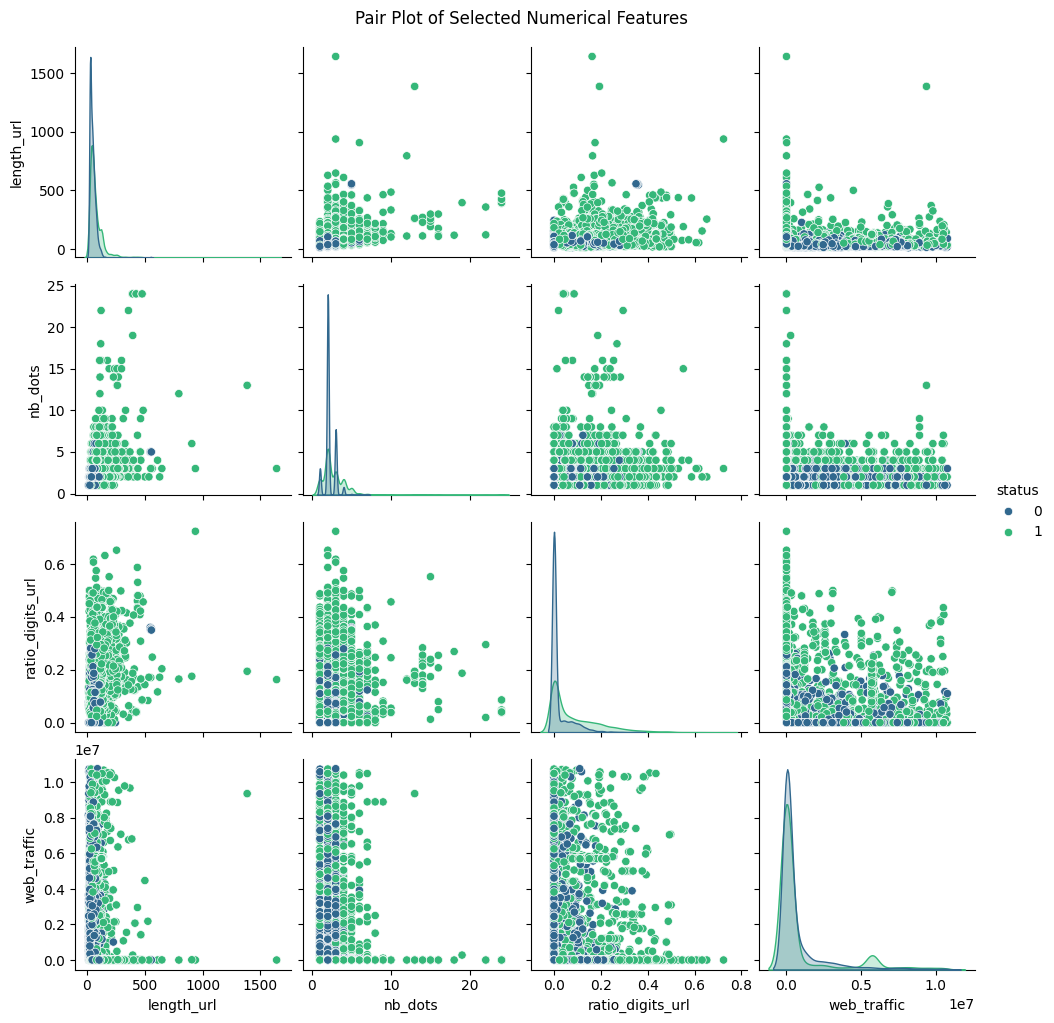

In [29]:
selected_features = ['length_url', 'nb_dots', 'ratio_digits_url', 'web_traffic', 'status']
# Plot pair plot
sns.pairplot(df[selected_features], hue='status', palette='viridis')
# Optional: Add title
plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02)
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

df['url']=LabelEncoder().fit_transform(df['url'])
df['status']=LabelEncoder().fit_transform(df['status'])
df 

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,4501,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.00,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4,0
1,3063,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.00,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2,1
2,8984,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.40,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,1
3,2778,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.00,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3,0
4,5261,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.00,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,4876,45,17,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0,0,0.043478,0,0.173913,0,1,80.000000,0,21.052632,78.947368,0,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6,0
11426,4285,84,18,0,5,0,1,1,0,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0,1
11427,9916,105,16,1,2,6,0,1,0,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.142857,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,13,5,1,3,1,15,8,15,6.153846,5.50,6.272727,0,1,0,0,0,0,68,0.470588,0.529412,0,5,0,0.000000,0,0.000000,0,1,6.250000,0,0.000000,0.000000,0,0,0,80.000000,0,0,0,0,0,0,2809,8515,8,0,1,10,0
11428,5705,38,30,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,22,22,0,12.500000,12.50,0.000000,

In [14]:
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'url'.
Replaced 620 outliers in 'length_url' with median.
Replaced 775 outliers in 'length_hostname' with median.
Replaced 1721 outliers in 'ip' with median.
Replaced 567 outliers in 'nb_dots' with median.
Replaced 1371 outliers in 'nb_hyphens' with median.
Replaced 245 outliers in 'nb_at' with median.
Replaced 1555 outliers in 'nb_qm' with median.
Replaced 761 outliers in 'nb_and' with median.
No outliers found in 'nb_or'.
Replaced 1564 outliers in 'nb_eq' with median.
Replaced 1695 outliers in 'nb_underscore' with median.
Replaced 76 outliers in 'nb_tilde' with median.
Replaced 355 outliers in 'nb_percent' with median.
Replaced 401 outliers in 'nb_slash' with median.
Replaced 8 outliers in 'nb_star' with median.
Replaced 197 outliers in 'nb_colon' with median.
Replaced 24 outliers in 'nb_comma' with median.
Replaced 248 outliers in 'nb_semicolumn' with median.
Replaced 11 outliers in 'nb_dollar' with median.
Replaced 210 outliers in 'nb_space' with median.
No out

In [15]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('status',axis = 1))

,features,VIF_Values
0,url,9.42
25,https_token,7.70
47,longest_word_path,5.86
33,nb_subdomains,5.36
46,longest_word_host,5.18
4,nb_dots,4.88
58,ratio_intHyperlinks,4.49
45,longest_words_raw,4.38
21,nb_www,4.21
50,avg_word_path,4.16


In [16]:
vif=calculate_vif(df.drop('status',axis = 1))
vif['VIF_Values']>10

0     False
25    False
47    False
33    False
46    False
4     False
58    False
45    False
21    False
50    False
40    False
1     False
49    False
68    False
48    False
2     False
44    False
67    False
59    False
41    False
87    False
86    False
42    False
14    False
43    False
83    False
70    False
57    False
61    False
75    False
26    False
38    False
63    False
80    False
82    False
5     False
71    False
65    False
84    False
16    False
79    False
3     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
15    False
17    False
18    False
19    False
20    False
22    False
23    False
24    False
27    False
28    False
29    False
30    False
31    False
32    False
34    False
35    False
36    False
37    False
39    False
51    False
52    False
53    False
54    False
55    False
56    False
60    False
62    False
64    False
66    False
69    False
72    False
73    False
74    False
76  

In [17]:
# Step 1: Standardize the data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['status'], how = 'left')

pca_df

Explained Variance Ratio: [0.57046592 0.970943  ]
Number of components selected: 2


,PC1,PC2,status
0,-7.873171,-5.366775,0
1,-6.311023,14.559213,1
2,-7.736537,-5.395951,1
3,5.910682,-2.885161,0
4,-6.772865,-5.403439,0
...,...,...,...
11425,-1.094859,73.295599,0
11426,-7.901367,-5.380939,1
11427,-7.912587,-5.342337,0
11428,-7.664649,-5.369196,0


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_and_test_split(data, tcol, testSize=0.3, randomState=3):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize,random_state=randomState)

def model_builder(model_name, model, data, t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_score_RF= accuracy_score(y_test, y_pred)
    accuracy_score_RF
    result = [model_name,accuracy_score_RF]
    return result

# RF= RandomForestClassifier()

# RF.fit(X_train,y_train)

# y_predict_RF= RF.predict(X_test)

# accuracy_score_RF = accuracy_score(y_test,y_predict_RF)

# accuracy_score_RF

model_builder(model_name='RandomForestClassifier',model=RandomForestClassifier(),data=pca_df,t_col='status')

['RandomForestClassifier', 0.8445610965296004]

In [19]:
from sklearn.linear_model import SGDClassifier

model_builder(model_name='SGDClassifier',model=SGDClassifier(),data=pca_df,t_col='status')

['SGDClassifier', 0.4549431321084864]

In [20]:
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Set up KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Classifier
model = RandomForestClassifier()

accuracies = []

# K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Results
print("Accuracies for each fold:", accuracies)
print("Average Accuracy:", np.mean(accuracies))


Accuracies for each fold: [1.0, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 1.0, 1.0, 0.9333333333333333]
Average Accuracy: 0.9533333333333335
